# 0.1- Importing libraries and dataset

In [37]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [38]:
# Turn the project folder path into a string
path = r'/Users/fatemehshahvirdi/Work-Related/Data Analysis/Data Immersion/Achievement 4/Instacart Basket Analysis'

In [39]:
# import orders_products_merged
ords_prods_merge = pd.read_pickle (os.path.join(path, '02 Data', 'prepared Data', 'ords_prods_grouped.pkl'))

# 0.2- Create Bar Chart for 'orders_day_of_week'

<Axes: xlabel='orders_day_of_week'>

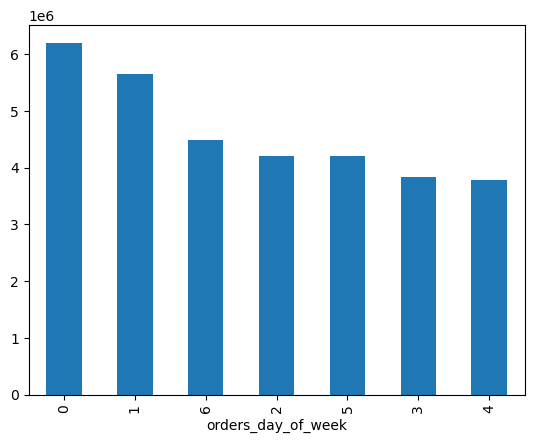

In [40]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

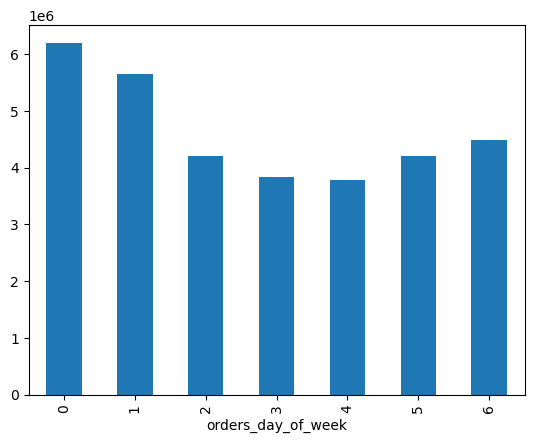

In [41]:
# Sorting by index number
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [42]:
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [43]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

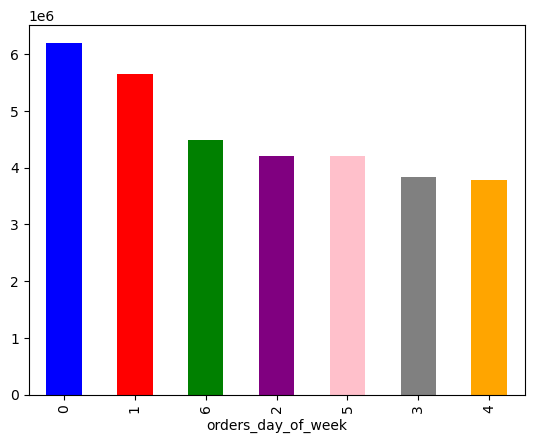

In [44]:
# Add colors to bars
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['blue', 'red', 'green', 'purple', 'pink', 'gray', 'orange',])

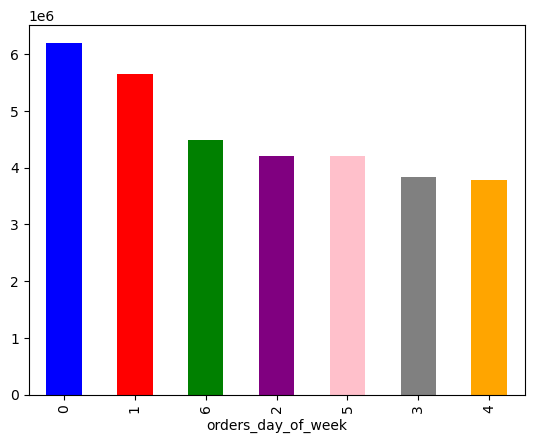

In [45]:
# Update the command to save it within the 'bar' object
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['blue', 'red', 'green', 'purple', 'pink', 'gray', 'orange',])

In [46]:
# Export the bar outside of jupyter
bar.figure.savefig(os.path.join (path, '04 Analysis', 'Visualization', 'bar_orders_dow.png'))

# 0.3 Create Histograms

<Axes: ylabel='Frequency'>

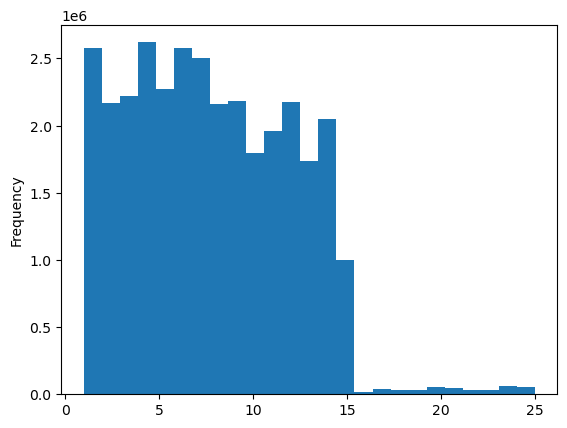

In [47]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [48]:
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.791005e+00
std      4.088904e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [49]:
ords_prods_merge['prices'].mean()

7.7910047

In [50]:
ords_prods_merge['prices'].median()

7.400000095367432

In [51]:
ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

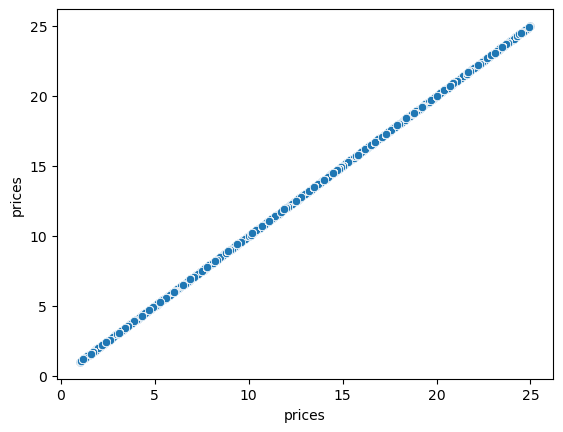

In [52]:
# To identify the outlier we create a Scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data= ords_prods_merge)

In [53]:
# Check again
ords_prods_merge['prices'].max()

25.0

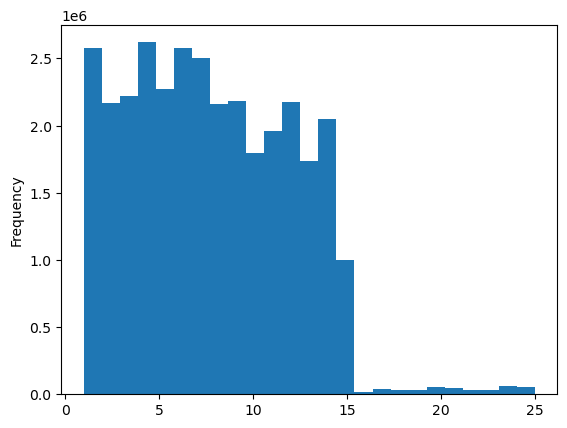

In [54]:
hist= ords_prods_merge['prices'].plot.hist(bins = 25)

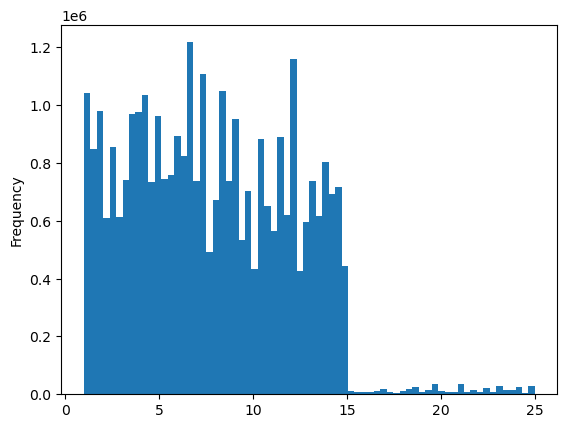

In [55]:
hist= ords_prods_merge['prices'].plot.hist(bins = 70)

In [56]:
# Export the histogram outside of jupyter
hist.figure.savefig(os.path.join (path, '04 Analysis', 'Visualization', 'hist_prices.png'))

# 04. Create a Line Chart by sampling a representative data frame

In [58]:
# Since the chart would require a great deal of computing power, I created a  subset with randomized values
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [59]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [60]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [62]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [63]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [64]:
# checking
len(ords_prods_merge)

32404859

In [65]:
len(big) + len(small)

32404859

In [66]:
# Reducing the process time by including the needed columns only
df_2 = small[['orders_day_of_week', 'prices']] 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


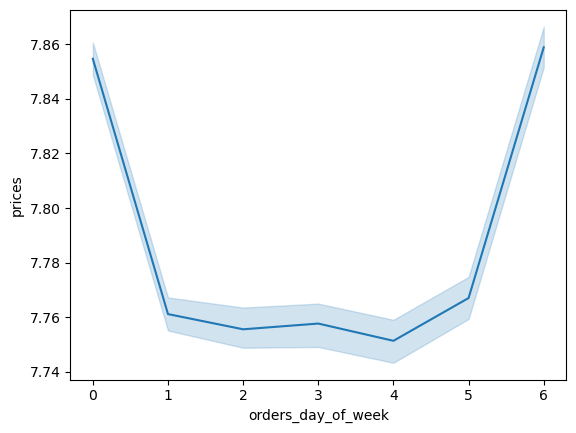

In [68]:
# Create the line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')